# Setup

## Imports

In [1]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import sys
import os
import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import utilities
from utils import setuputil, trainutil, inferutil
from classes.models import SimpleGeluEmbed

# Reload the necessary modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(SimpleGeluEmbed)

# Import the required utils
from utils.setuputil import setup_config, display_config
from utils.trainutil import train_model
from utils.inferutil import infer_one, infer_full

# Import the SimpleGeluEmbedAdd class
from classes.models.SimpleGeluEmbed import SimpleGeluEmbedAvg

## Config Setup

In [2]:
# Define the input configuration for the simple model
input_config = {
    # Environment and Model Info
    "env": "bvm",
    "approach": "simple",
    "model_name": "SimpleGeluEmbedAvg",
    
    # System Configuration
    "device": "cuda:0",
    "threads": 32,
    "seed": 42,
    
    # Data Configuration
    "data_dir": "../../../data/farzan",
    "data_ds": "manual",
    
    # Model Parameters
    "rows": 100,
    "cols": 100,
    "tokens": 16,
    
    # Vocabulary Parameters
    "vocab_size": 150000,
    "vocab_space": True,
    "vocab_case": "both",
    
    # Training Parameters
    "batch": 40,
    "lr": 1e-1,
    "mu": 0.25,
    "epochs": 20,
    "patience": 2,
    "save_int": 10,
    "save_dir": "../models/",
}

# Setup the configuration using setuputil and display it
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
# System variables
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
spreadsheet_vocab = config["vocab"]
spreadsheet_wvs = config["wvs"]

# Training parameters
batch_size = config["batch"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

Getting Vocab: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 120.06it/s]


40(P) = 40(G) + 0(E)
Unique Tokens: 5593
Vocab Size: 5597


Creating Word Embeddings: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 5597/5597 [00:00<00:00, 79459.52it/s]


Word Embeddings Shape: torch.Size([5597, 50])


Processing files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 7223.46it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 5232.42it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 4336.54it/s]



5(P) = 5(G) + 0(E)

Configuration for SIMPLE approach:
{
  "env": "bvm",
  "approach": "simple",
  "model_base": "glove50",
  "model_name": "SimpleGeluEmbedAvg",
  "rows": 100,
  "cols": 100,
  "tokens": 16,
  "DEVICE": "cuda:0",
  "THREADS": 32,
  "seed": 42,
  "data_ds": "manual",
  "data_dir": "../../../data/farzan",
  "train_dir": "../../../data/farzan/manual_train",
  "val_dir": "../../../data/farzan/manual_val",
  "test_dir": "../../../data/farzan/manual_test",
  "vocab_size": 5597,
  "vocab_space": true,
  "vocab_case": "both",
  "vocab": "<Vocab Object>",
  "wvs": "<Embedding Matrix>",
  "train_loader": "<LoaderSimple Object>",
  "val_loader": "<LoaderSimple Object>",
  "test_loader": "<LoaderSimple Object>",
  "batch": 40,
  "lr": 0.1,
  "mu": 0.25,
  "epochs": 20,
  "patience": 2,
  "save_int": 10,
  "save_dir": "../models/",
  "save_name": "bsim42_SimpleGeluEmbedAvg_manual_100x100x16_bSp5k_bsz40lr1e-1ep20pa2"
}


# Model Training

## Define the model

In [3]:
# Define the untrained model and move it to the device
untrained_model = SimpleGeluEmbedAvg(spreadsheet_wvs).to(DEVICE)
print(untrained_model)

SimpleGeluEmbedAvg(
  (_embed): Embedding(5597, 50)
  (_drop): Dropout(p=0.05, inplace=False)
  (_non_linear): GELU()
  (_pred): Linear(in_features=50, out_features=1, bias=True)
)


## Train the Model

In [4]:
trained_model = train_model(
    model=untrained_model,
    train_data=train_loader, 
    val_data=val_loader, 
    DEVICE=DEVICE, 
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config
)

Epoch 0


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.33s/it]


Train Loss: 1.7129079103469849, Perplexity: 1.0000171292258069
Val Loss: 0.7026445269584656, Perplexity: 1.0000070264699552


Epoch 1


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.29s/it]


Train Loss: 0.712165892124176, Perplexity: 1.0000071216842803
Val Loss: 0.4020729660987854, Perplexity: 1.000004020737744


Epoch 2


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.32s/it]


Train Loss: 0.40179795026779175, Perplexity: 1.0000040179875749
Val Loss: 0.30077892541885376, Perplexity: 1.0000030077937776


Epoch 3


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.32s/it]


Train Loss: 0.30232474207878113, Perplexity: 1.0000030232519908
Val Loss: 0.2615412175655365, Perplexity: 1.0000026154155959


Epoch 4


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.29s/it]


Train Loss: 0.2652941048145294, Perplexity: 1.0000026529445671
Val Loss: 0.237630695104599, Perplexity: 1.0000023763097745


Epoch 5


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.33s/it]


Train Loss: 0.24299323558807373, Perplexity: 1.000002429935308
Val Loss: 0.2206246554851532, Perplexity: 1.0000022062489886


Epoch 6


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.30s/it]


Train Loss: 0.22845754027366638, Perplexity: 1.0000022845780123
Val Loss: 0.21381859481334686, Perplexity: 1.000002138188234


Epoch 7


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.31s/it]


Train Loss: 0.22286847233772278, Perplexity: 1.000002228687207
Val Loss: 0.2096129208803177, Perplexity: 1.0000020961314058


Epoch 8


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.29s/it]


Train Loss: 0.2212611734867096, Perplexity: 1.0000022126141828
Val Loss: 0.18059679865837097, Perplexity: 1.0000018059696174


Epoch 9


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.27s/it]


Train Loss: 0.19221696257591248, Perplexity: 1.000001922171473
Val Loss: 0.16726061701774597, Perplexity: 1.000001672607569

Model Saved

Epoch 10


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.28s/it]


Train Loss: 0.18001489341259003, Perplexity: 1.0000018001505544
Val Loss: 0.15600605309009552, Perplexity: 1.0000015600617478


Epoch 11


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.27s/it]


Train Loss: 0.16927717626094818, Perplexity: 1.0000016927731954
Val Loss: 0.14548833668231964, Perplexity: 1.0000014548844252


Epoch 12


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.28s/it]


Train Loss: 0.15958188474178314, Perplexity: 1.0000015958201207
Val Loss: 0.13744792342185974, Perplexity: 1.0000013744801788


Epoch 13


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.28s/it]


Train Loss: 0.15308059751987457, Perplexity: 1.0000015308071468
Val Loss: 0.12930342555046082, Perplexity: 1.0000012930350914


Epoch 14


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.27s/it]


Train Loss: 0.1450899988412857, Perplexity: 1.0000014509010409
Val Loss: 0.12294352054595947, Perplexity: 1.0000012294359613


Epoch 15


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.27s/it]


Train Loss: 0.1383214294910431, Perplexity: 1.0000013832152514
Val Loss: 0.11649726331233978, Perplexity: 1.0000011649733116


Epoch 16


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.28s/it]


Train Loss: 0.13311201333999634, Perplexity: 1.0000013311210194
Val Loss: 0.11132244020700455, Perplexity: 1.0000011132250217


Epoch 17


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.27s/it]


Train Loss: 0.12860329449176788, Perplexity: 1.000001286033772
Val Loss: 0.10624691098928452, Perplexity: 1.0000010624696742


Epoch 18


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.30s/it]


Train Loss: 0.12363970279693604, Perplexity: 1.0000012363977924
Val Loss: 0.10207603871822357, Perplexity: 1.0000010207609082


Epoch 19


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.28s/it]

Train Loss: 0.11985062062740326, Perplexity: 1.0000011985069246
Val Loss: 0.09797429293394089, Perplexity: 1.0000009797434093

Model Saved


TRAINING DONE at epoch 19, best epoch 19
Train Loss = 0.11985062062740326, Perplexity = 1.0000011985069246
Val Loss = 0.09797429293394089, Perplexity = 1.0000009797434093


# Evaluation

In [5]:
# Define params forevaluation
thresh = 0.91
loc = 0
cond = '>'
disp_max=True

## Single Example


Filename: ../../../data/farzan/manual_train/advanced-placement-mathematics-enrollment (1).xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,3): 0.92550420761108398438
(3,1): 0.93292969465255737305
(5,18): 0.93548256158828735352
(4,5): 0.93809092044830322266
(4,11): 0.93957340717315673828
(5,4): 0.95252299308776855469
(3,2): 0.97535276412963867188
(3,3): 0.97566163539886474609
(3,21): 0.97982209920883178711
(1,1): 0.98421233892440795898
(4,15): 0.98681527376174926758
(4,9): 0.98860299587249755859
(4,7): 0.99002403020858764648
(3,19): 0.99057883024215698242
(4,3): 0.99096769094467163086
(3,22): 0.99158316850662231445
(4,13): 0.99516844749450683594
(3,17): 0.99700433015823364258

NB to B ratio: Predicted = 9913:87 | Actual = 9937:63
Accuracy: 99.76% | Precision: 72.41% | Recall: 100.00% | F1-Score: 0.84



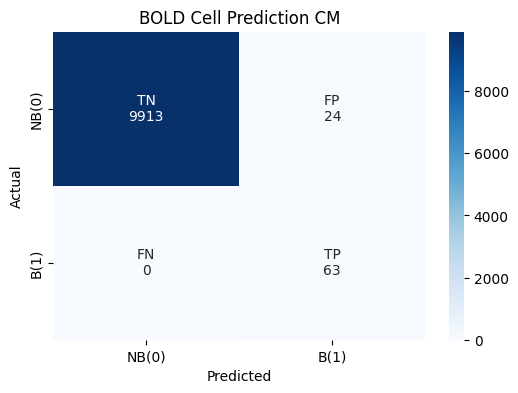


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0



Filename: ../../../data/farzan/manual_val/ffelbydefermenttype.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(15,0): 0.92611378431320190430
(31,0): 0.92977410554885864258
(7,0): 0.93169736862182617188
(27,0): 0.93190985918045043945
(11,0): 0.93315517902374267578
(23,0): 0.93586647510528564453
(5,14): 0.93734586238861083984
(19,0): 0.93769967555999755859
(7,1): 0.93969392776489257812
(9,1): 0.94060266017913818359
(5,10): 0.94118547439575195312
(8,1): 0.94365036487579345703
(10,1): 0.94425749778747558594
(5,6): 0.94981193542480468750
(5,16): 0.96481388807296752930
(5,12): 0.96732985973358154297
(5,2): 0.96945929527282714844
(5,4): 0.97699600458145141602
(5,8): 0.97883546352386474609
(0,0): 0.98015207052230834961
(6,0): 0.98588979244232177734
(6,3): 0.99068236351013183594
(6,2): 0.99716621637344360352
(6,4): 0.99756526947021484375

NB to B ratio: Predicted = 9896:104 | Actual = 9896:104
Accuracy: 100.00% | Precision: 100.00% | Recall: 100.00% | F1-Score: 1.00



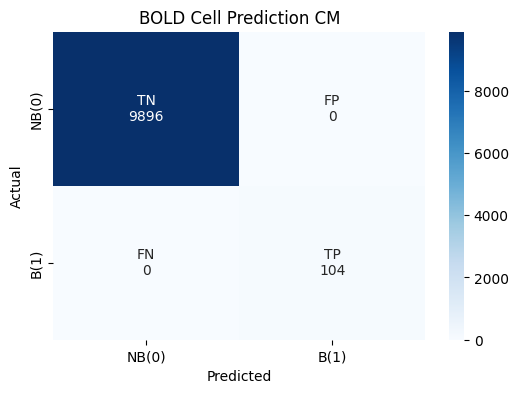


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Filename: ../../../data/farzan/manual_test/Harassment-Bullying-on-basis-of-sex_disciplined.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,18): 0.92539423704147338867
(5,3): 0.92550420761108398438
(3,1): 0.93292969465255737305
(5,22): 0.93548256158828735352
(4,5): 0.93809092044830322266
(4,11): 0.93957340717315673828
(5,4): 0.95252299308776855469
(6,1): 0.95456856489181518555
(3,2): 0.97535276412963867188
(3,3): 0.97566163539886474609
(3,23): 0.97982209920883178711
(4,15): 0.98681527376174926758
(4,9): 0.98860299587249755859
(4,7): 0.99002403020858764648
(3,21): 0.99057883024215698242
(4,3): 0.99096769094467163086
(3,24): 0.99158316850662231445
(1,1): 0.99404537677764892578
(4,13): 0.99516844749450683594
(3,17): 0.99614953994750976562
(3,19): 0.99775958061218261719

NB to B ratio: Predicted = 9928:72 | Actual = 9930:70
Accuracy: 99.98% | Precision: 97.22% | Recall: 100.00% | F1-Score: 0.99



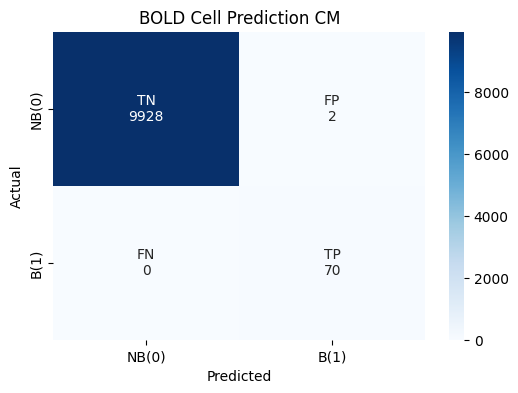


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Check with single example
infer_one(trained_model, train_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)
infer_one(trained_model, val_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)
infer_one(trained_model, test_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)

## All Examples

Batch Inference: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.49s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 396263:3737 | Actual = 396714:3286
Accuracy: 99.89% | Precision: 87.88% | Recall: 99.94% | F1-Score: 0.94



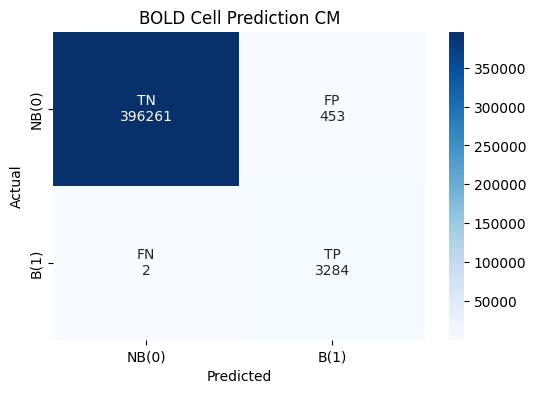

In [7]:
# Evaluate the model on all train files
infer_full(trained_model, train_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)

Batch Inference: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.29s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49551:449 | Actual = 49602:398
Accuracy: 99.90% | Precision: 88.64% | Recall: 100.00% | F1-Score: 0.94



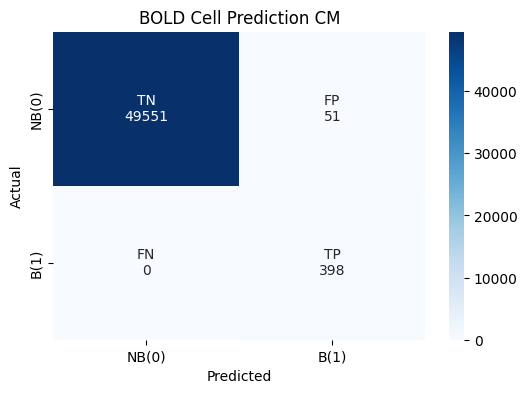

In [8]:
# All val files
infer_full(trained_model, val_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)

Batch Inference: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.29s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49571:429 | Actual = 49606:394
Accuracy: 99.86% | Precision: 87.65% | Recall: 95.43% | F1-Score: 0.91



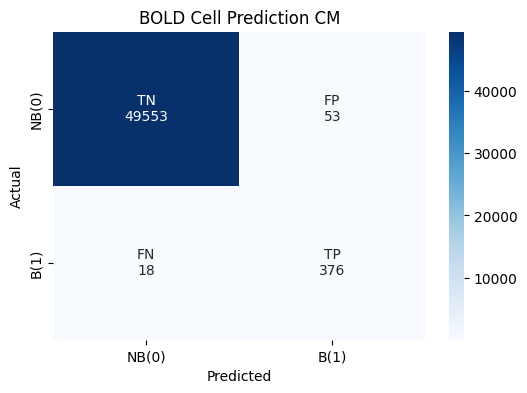

In [9]:
# All test files
infer_full(trained_model, test_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)